In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Analysis_ex2 import readsummary, plot_features

In [4]:
df_summary8 = readsummary("Data ex1/mass_8_metallicity_0.02_detailled")
df_summary100 = readsummary("Data ex2/mass_100_metallicity_02")

In [17]:
def sum_and_frac(df_summary):
    sum_of_lum = (
        df_summary["luminosity from PP chain"]
        + df_summary["luminosity from CNO cycle"]
        + df_summary["luminosity from triple-alpha reactions"]
        + df_summary["luminosity from metal burning"]
        + df_summary["luminosity of neutrino losses"]
    )
    frac_lum_PP = df_summary["luminosity from PP chain"] / sum_of_lum
    frac_lum_CNO = df_summary["luminosity from CNO cycle"] / sum_of_lum
    frac_lum_3α = df_summary["luminosity from triple-alpha reactions"] / sum_of_lum
    return [frac_lum_PP, frac_lum_CNO, frac_lum_3α, sum_of_lum]


# print(frac_lum_PP,frac_lum_CNO,frac_lum_3α)

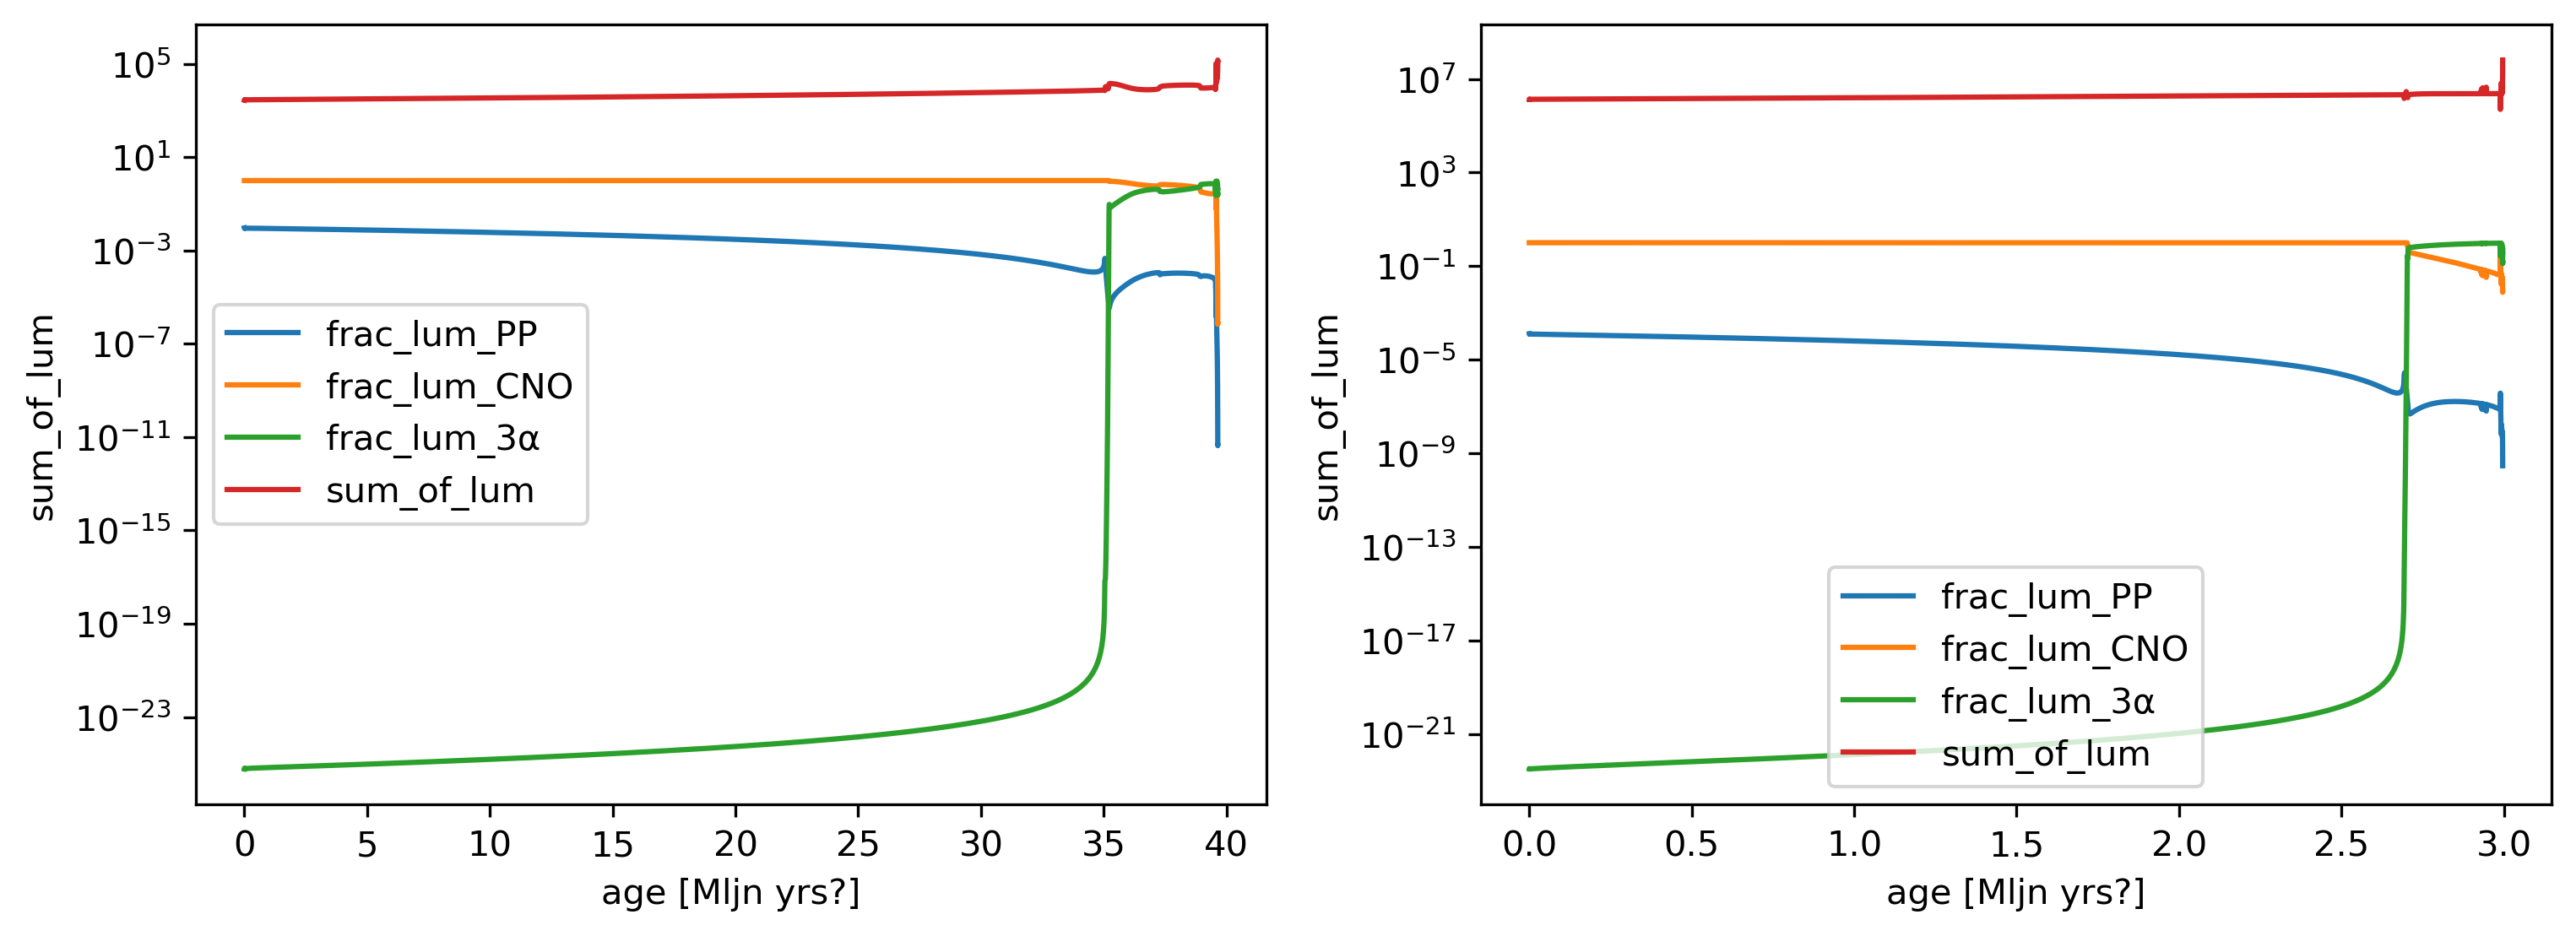

In [26]:
variable_list8 = sum_and_frac(df_summary8)
variable_list100 = sum_and_frac(df_summary100)

variable_names = ["frac_lum_PP", "frac_lum_CNO", "frac_lum_3α", "sum_of_lum"]
xvalues8 = df_summary8.age / 1e6
xvalues100 = df_summary100.age / 1e6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=150)

plot_features(
    variable_list8,
    variable_names,
    xvalues8,
    ax1,
    constant_value=8,
    xaxis="age",
    together_on_one_figure="True",
)
plot_features(
    variable_list100,
    variable_names,
    xvalues100,
    ax2,
    constant_value=100,
    xaxis="age",
    together_on_one_figure="True",
)

In [ ]:
def readdetailedfiles(foldername, idx):
    fname = f"structure_{idx:05d}.txt"
    return pd.read_csv(
        f"{foldername}/{fname}",
        header=None,
        sep=r"\s+",
        names=[
            "lagrangian mass coordinate",
            "radius coordinate",
            "luminosity",
            "total pressure",
            "density",
            "temperature",
            "specific internal energy",
            "specific entropy",
            "specific heat at constant pressure",
            "first adiabatic exponent",
            "adiabatic temperature gradient",
            "mean molecular weight",
            "electron number density",
            "electron pressure",
            "radiation pressure",
            "radiative temperature gradient",
            "material temperature gradient",
            "convective velocity",
            "rosseland mean opacity",
            "power per unit mass from all nuclear reactions, excluding neutrino losses",
            "power per unit mass from PP chain",
            "power per unit mass from CNO cycle",
            "power per unit mass from triple-alpha reaction",
            "power loss per unit mass in nuclear neutrinos",
            "power loss per unit mass in nuclear non-neutrinos",
            "power per unit mass from gravitational contraction" "hydrogen mass fraction",
            "hydrogen mass fraction",
            "molecular hydrogen mass fraction",
            "singly-ionized hydrogen mass fraction",
            "helium mass fraction",
            "singly-ionized helium mass fraction",
            "doubly-ionized helium mass fraction",
            "carbon mass fraction",
            "nitrogen mass fraction",
            "oxygen mass fraction",
            "electron degeneracy parameter",
        ],
    )

In [ ]:
steps = df_summary8["step number"]
radius = np.zeros((len(steps), 199))
power_PP = np.zeros((len(steps), 199))
power_CNO = np.zeros((len(steps), 199))
power_3α = np.zeros((len(steps), 199))

for i in steps:
    df_step = readdetailedfiles("mass_8_metallicity_0.02_detailled", i)

    radius[i] = df_step["radius coordinate"]
    power_PP[i] = df_step["power per unit mass from PP chain"]
    power_CNO[i] = df_step["power per unit mass from CNO cycle"]
    power_3α[i] = df_step["power per unit mass from triple-alpha reaction"]

In [16]:
len(steps)

1157

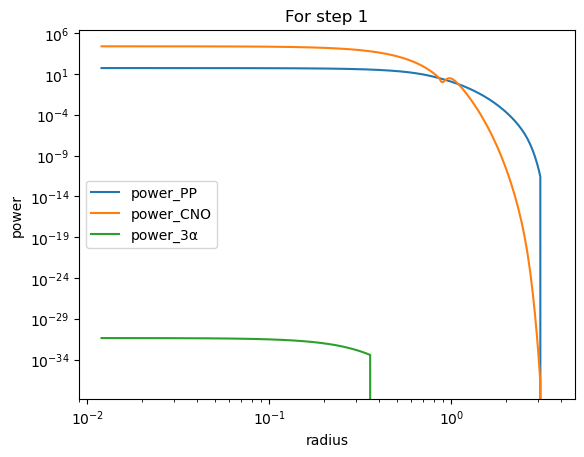

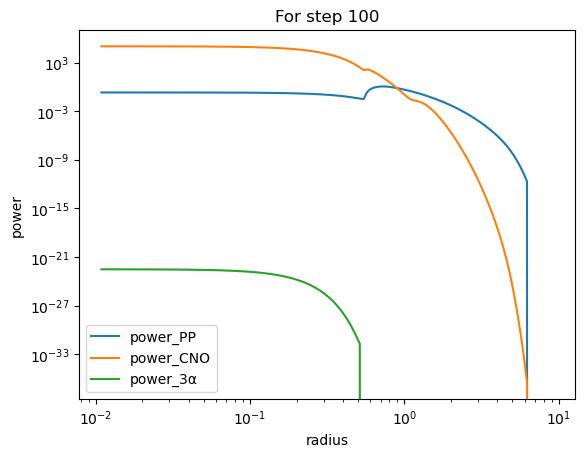

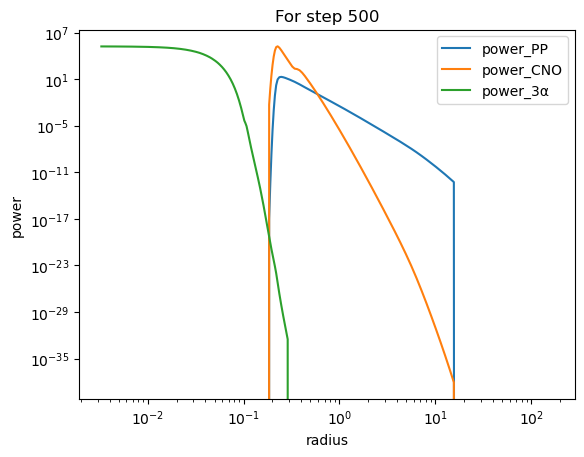

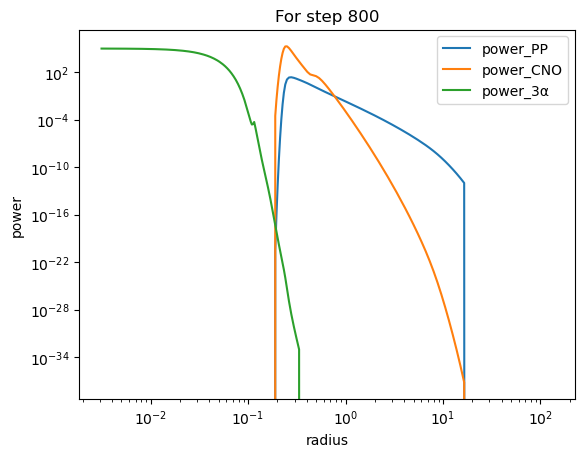

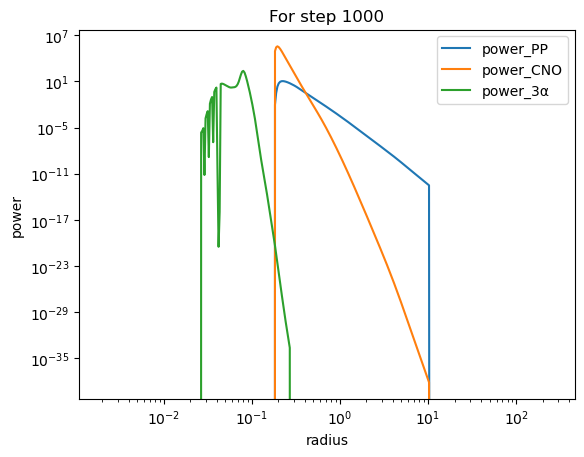

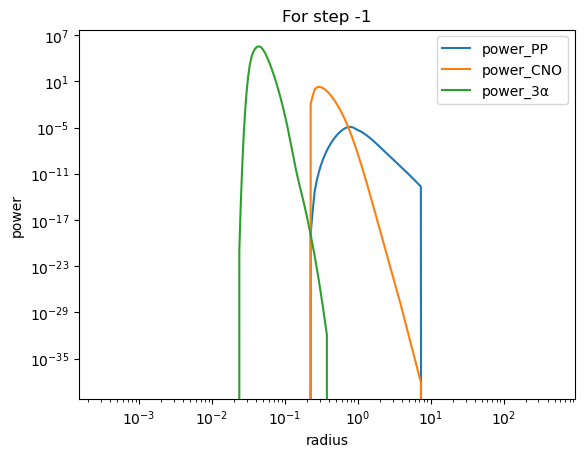

In [ ]:
# for step_number in [1,500,-1]:
df_steps = [1, 100, 500, 800, 1000, -1]
# df_steps = 1

for k, i in enumerate(df_steps):
    plt.figure()
    plt.title(f"For step {i}")
    plt.plot(radius[i], power_PP[i], label="power_PP")
    plt.plot(radius[i], power_CNO[i], label="power_CNO")
    plt.plot(radius[i], power_3α[i], label="power_3α")
    plt.legend()
    plt.xlabel("radius")
    plt.ylabel("power")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()